In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
customer = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/customers.csv")
geolocation = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/geolocation.csv")
order_items = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/order_items.csv")
order_reviews = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/order_reviews.csv", encoding='latin1')
orders = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/orders.csv")
payments = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/payments.csv")
products = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/products.csv")
sellers = pd.read_csv("D:/DA Project/SQL/Target SQL/Target- SQL Business Case/sellers.csv")

In [13]:
# 1.	Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset:
#    1.	Data type of all columns in the "customers" table.
#   2.	Get the time range between which the orders were placed.
#   3.	Count the Cities & States of customers who ordered during the given period.


In [17]:
customer


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [20]:
# 1.	Data type of all columns in the "customers" table.
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [25]:
#2.	Get the time range between which the orders were placed.
orders["order_purchase_timestamp"].min()

'2016-09-04 21:15:19'

In [26]:
orders["order_purchase_timestamp"].max()

'2018-10-17 17:30:18'

In [45]:
#3.	Count the Cities & States of customers who ordered during the given period.

# find min and max from orders table
start_time = orders["order_purchase_timestamp"].min()
end_time = orders["order_purchase_timestamp"].max()

# filter data in the range of min and max
filter_data = orders[
         (orders["order_purchase_timestamp"] >= start_time ) &
          (orders["order_purchase_timestamp"] <= end_time)] 
filter_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [46]:
# merge filter data with customers table
merged_data = pd.merge(filter_data  , customer , on = "customer_id" , how = "inner")
merged_data.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [50]:
#count city and state in the customer table
count_city = merged_data["customer_city"].nunique()
count_state = merged_data["customer_state"].nunique() 
print("City : " , count_city ," ," ,  "State : " , count_state)

City :  4119  , State :  27


In [54]:
#   2.	In-depth Exploration:

# 1.	Is there a growing trend in the no. of orders placed over the past years?
# 2.	Can we see some kind of monthly seasonality in terms of the no. of orders being placed?
# 3.	During what time of the day, do the Brazilian customers mostly place their orders? (Dawn, Morning, Afternoon or Night)
#     	0-6 hrs : Dawn
#     	7-12 hrs : Mornings
#     	13-18 hrs : Afternoon
#     	19-23 hrs : Night 




In [13]:
# 2.1.	Is there a growing trend in the no. of orders placed over the past years?
orders.columns # to checl all columns name
(orders["order_purchase_timestamp"]).dtype  # check data type of order_purchase_timestamp because I need to extract year from this

# convert order_purchase_timestamp into date time format
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

# Extract year from timestamp
orders["year"] = orders["order_purchase_timestamp"].dt.year

# Group by year and count no of orders in orders table 
orders_per_year = orders.groupby("year")["order_id"].count().reset_index()

# Rename columns for clarity
orders_per_year.columns = ["Year", "Total Orders"]

print(orders_per_year)

   Year  Total Orders
0  2016           329
1  2017         45101
2  2018         54011


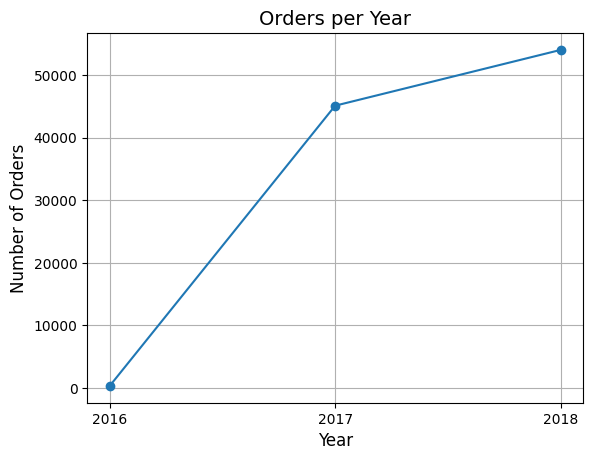

In [99]:
plt.plot(order_per_year["year"] , orders_per_year["Total Orders"] , marker = "o")
plt.title("Orders per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(orders_per_year["Year"])
plt.grid(True)
plt.show()

In [100]:
# 📈 Trend Analysis:
# The number of orders placed shows a clear upward trend from 2016 to 2018.
# In 2016, the order count was relatively low as the platform was gaining traction.
# A significant increase is observed in 2017, indicating growing customer adoption.
# The trend peaks in 2018, suggesting strong market expansion and user engagement.
# This pattern reflects a positive growth trajectory and highlights the platform's successful customer acquisition strategy during this period.

In [28]:
# 2.2.	Can we see some kind of monthly seasonality in terms of the no. of orders being placed?

# convert order_purchase_timestamp into date time format
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

#extact year and month 
orders["year"] = orders["order_purchase_timestamp"].dt.year
orders["month"] = orders["order_purchase_timestamp"].dt.month

# group by order_id by year than month
count_orderId = orders.groupby(["year" , "month"])["order_id"].count().reset_index()
count_orderId

,year,month,order_id
0,2016,9,4
1,2016,10,324
2,2016,12,1
3,2017,1,800
4,2017,2,1780
5,2017,3,2682
6,2017,4,2404
7,2017,5,3700
8,2017,6,3245
9,2017,7,4026


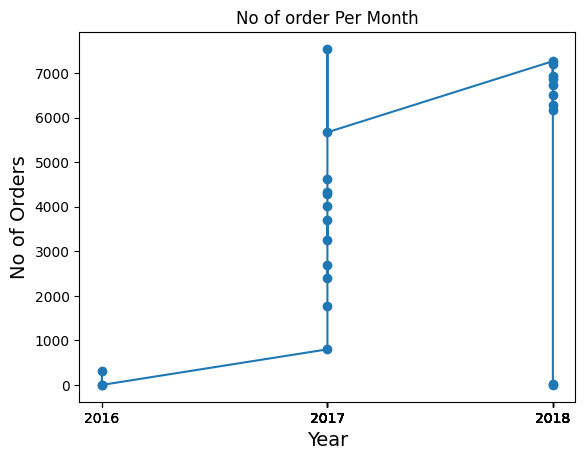

In [43]:
plt.plot(count_orderId["year"] , count_orderId["order_id"], marker ="o")
plt.title("No of order Per Month" , fontsize =12)
plt.xlabel("Year" , fontsize = 14)
plt.ylabel("No of Orders" , fontsize = 14)
plt.xticks(count_orderId["year"])
plt.show()




In [56]:
# 3.	During what time of the day, do the Brazilian customers mostly place their orders? (Dawn, Morning, Afternoon or Night)
#     	0-6 hrs : Dawn
#     	7-12 hrs : Mornings
#     	13-18 hrs : Afternoon
#     	19-23 hrs : Night 


#e Extract hour from orders table and purchase column

orders["hour"] = pd.to_datetime(orders["order_purchase_timestamp"]).dt.hour


orders["Dawn"] = (orders["hour"] >= 0) & (orders["hour"] <= 6)
orders["Morning"] = (orders["hour"] >= 7) & (orders["hour"] <= 12)
orders["Afternoon"] = (orders["hour"] >= 13) & (orders["hour"] <= 18)
orders["Night"] = (orders["hour"] >= 19) & (orders["hour"] <= 23)

dawn_count = orders["Dawn"].sum()
morning_count = orders["Morning"].sum()
afternoon_count = orders["Afternoon"].sum()
night_count = orders["Night"].sum()

print("Dawn orders:", dawn_count)
print("Morning orders:", morning_count)
print("Afternoon orders:", afternoon_count)
print("Night orders:", night_count)

# Maximum orders in Afternoon

Dawn orders: 5242
Morning orders: 27733
Afternoon orders: 38135
Night orders: 28331
